#### Libraries

In [3]:
# Importing libraries 
import os
import sys
import glob
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt
import urllib.request
from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.io import fits
import pandas as pd
import urllib.request
import requests
import time

#### Data entry

In [28]:
#Getting the individual coadded files names
local_dir = "/home/colgoat/spc_DESIedr/" #path to the catalogs
pn_sv1 = "https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv1/dark/" # File database link for sv1
pn_sv3 = "https://data.desi.lbl.gov/public/edr/spectro/redux/fuji/healpix/sv3/dark/" # File database link for sv3
EDR_qsolist = [] # List of spectra of interest from DESI EDR
print("\n")
print("---------------------------------------------")
print("\n")
file1 = "QSO_cat_fuji_sv1_dark_bal_mask_v1.0.fits" # Name of the first catalog (sv1)
lc_sv1 = os.path.join(local_dir,file1) # lc_sv1 = Local file sv1
fc_sv1 = fits.open(lc_sv1) # fc_sv1 = Open .fits catalog file of sv1
SV1 = Table.read(fc_sv1) # SV1 = Reading the file of SV1 as a BinTable 
q_sv1 = (SV1['Z']>=2.1) & (SV1['PROGRAM']=='dark') # q_sv1 = Query from main catalog (filtering)
catfil_sv1 = SV1[q_sv1] # catfil_sv1 = Filtered catalog sv1
catfil_sv1_hpix = catfil_sv1.group_by("HPXPIXEL") # catfil_sv1 = Grouping filtered catalog by HEALPIX criteria
HPX_sv1 = catfil_sv1_hpix["HPXPIXEL"]/100 # HPX_sv1 = Getting the healpix ID for path on database
print("Number of spectra in SV1: ",len(catfil_sv1)) # Showing the number of targets on screen
for p,m in zip(HPX_sv1,catfil_sv1_hpix["HPXPIXEL"]): # Adding selected Targets to the list
    EDR_qsolist.append(pn_sv1+str(int(p))+"/"+str(m)+"/coadd-sv1-dark-"+str(m)+".fits")
fc_sv1.close()
file2 = "QSO_cat_fuji_sv3_dark_bal_mask_v1.0.fits" # Name of the first catalog (sv3)
lc_sv3 = os.path.join(local_dir,file2) # lc_sv3 = Local file sv3
fc_sv3 = fits.open(lc_sv3) # fc_sv3 = Open .fits catalog file of sv3
SV3 = Table.read(fc_sv3) # SV3 = Reading the file of SV3 as a BinTable
q_sv3 = (SV3['Z']>=2.1) & (SV3['PROGRAM']=='dark') # q_sv3 = Query from main catalog (filtering)
catfil_sv3 = SV3[q_sv3] # catfil_sv3 = Filtered catalog sv3
catfil_sv3_hpix = catfil_sv3.group_by("HPXPIXEL") # catfil_sv3 = Grouping filtered catalog by HEALPIX criteria
HPX_sv3 = catfil_sv3_hpix["HPXPIXEL"]/100 # HPX_sv3 = Getting the healpix ID for path on database
print("Number of spectra in SV3: ",len(catfil_sv3))
for p,m in zip(HPX_sv3,catfil_sv3_hpix["HPXPIXEL"]): # Adding selected Targets to the list
    EDR_qsolist.append(pn_sv3+str(int(p))+"/"+str(m)+"/coadd-sv3-dark-"+str(m)+".fits")
fc_sv3.close()
EDRcat_stk = vstack(([catfil_sv1,catfil_sv3])) # EDR filtered catalogs stacked for both surveys and sorted
EDRcat_stk.sort(['TARGETID','SURVEY'])
print("Total number of DESI EDR spectra (SV1 & SV3) to be used: ",len(EDR_qsolist))









---------------------------------------------


Number of spectra in SV1:  11853
Number of spectra in SV3:  14910
Total number of DESI EDR spectra (SV1 & SV3) to be used:  26763


In [36]:
len(SV3)

50993

#### Histograms

/tmp/ipykernel_8892/1666939034.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)
/tmp/ipykernel_8892/1666939034.py:65: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 2)


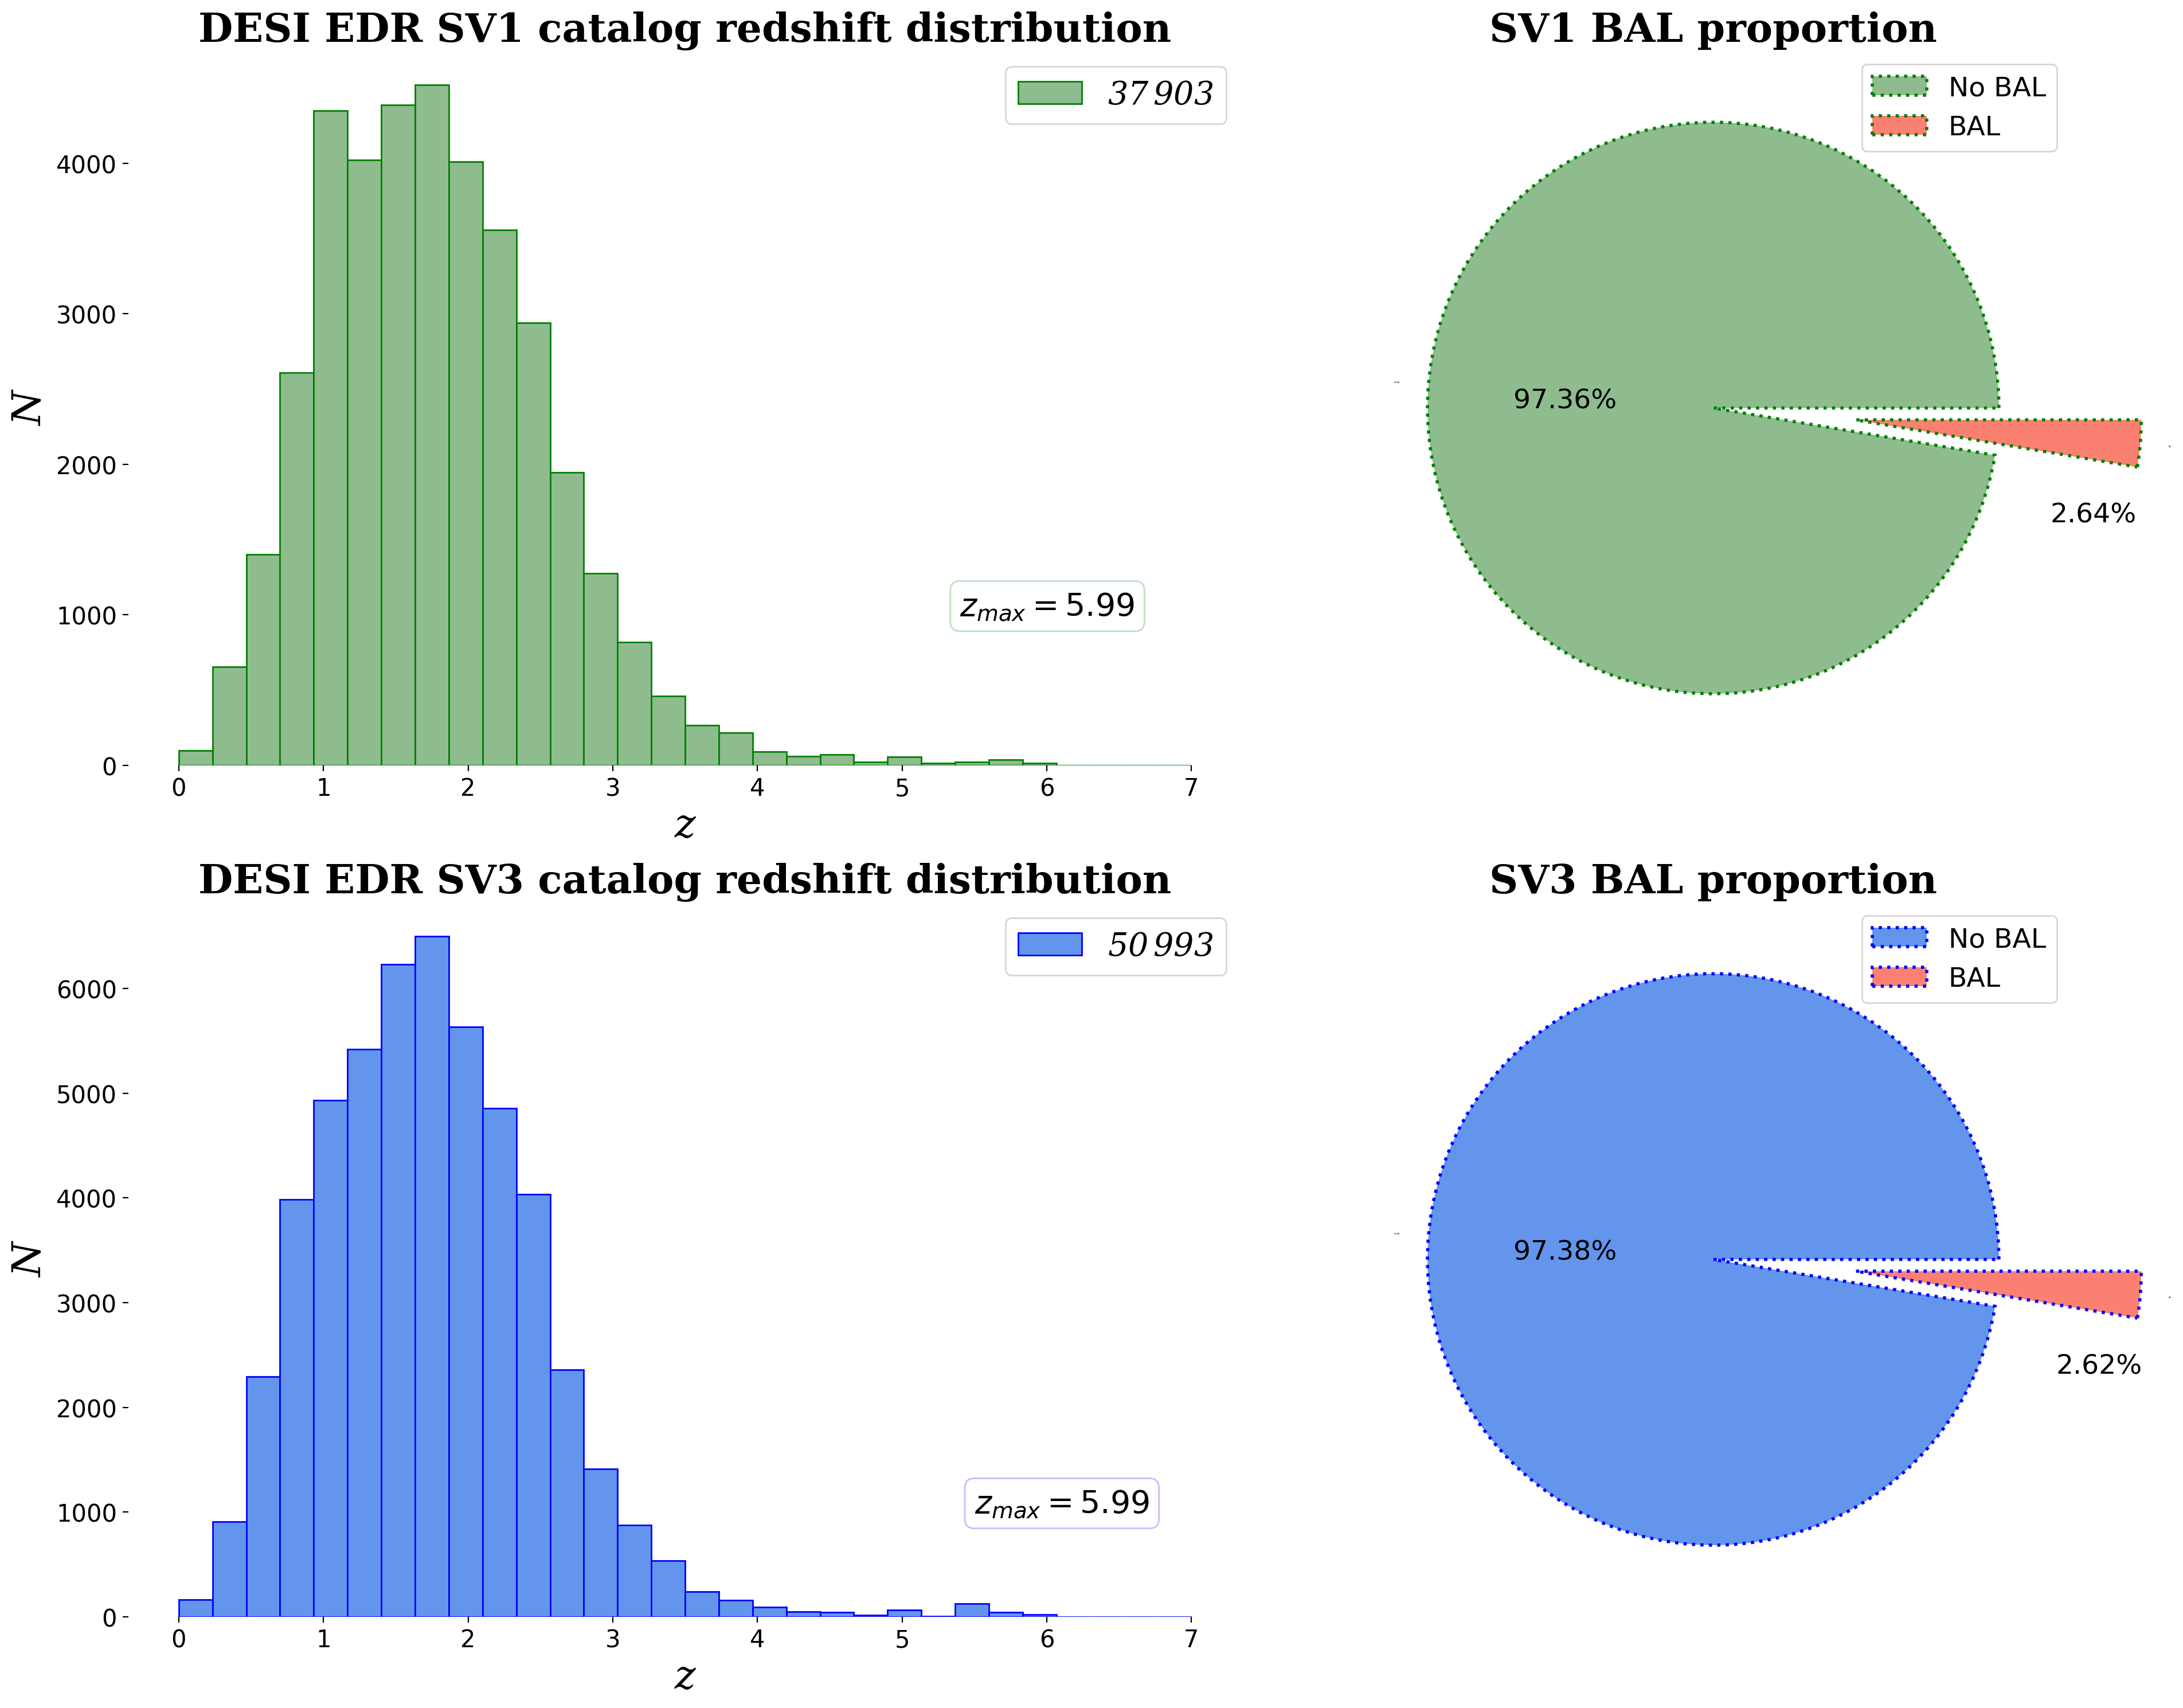

In [39]:
#plt.rcParams["figure.figsize"] = [10, 7]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False

fig = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(20,15),dpi=200)

colrs14 = ["darkseagreen", "salmon"]
colrs16 = ["cornflowerblue", "salmon"]

lbls = ["No BAL", "BAL"]
expl = [0, 0.5]
titles = ['DESI EDR SV1 catalog','DESI EDR SV3 catalog']

zm = [max(SV1['Z']),max(SV3['Z'])]

txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :20}

plt.subplot(2, 2, 1)
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.hist(SV1['Z'],alpha = 1, color ='darkseagreen', 
         label = '37$\,$903', range = (0,7), bins = 30, edgecolor="green")
plt.xlabel("z", style = 'oblique', family = 'serif', size = 25)
plt.ylabel("N", style = 'oblique', family = 'serif', size = 25)
plt.title(titles[0]+" redshift distribution", weight='semibold', style= 'normal', family = 'serif', size =25)
plt.legend(loc="upper right", prop = txt_prop)
plt.text(5.4, 1000, ('$z_{max} = $'+str(round(zm[0],2))), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'green'}, size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)



plt.subplot(2, 2, 3)
plt.hist(SV3['Z'],alpha = 1, color = 'cornflowerblue', 
         label = '50$\,$993', range = (0,7), bins = 30, edgecolor="blue")
plt.xlabel("z", style = 'oblique', family = 'serif', size = 25)
plt.ylabel("N", style = 'oblique', family = 'serif', size = 25)
plt.title(titles[1]+" redshift distribution", weight='semibold', style = 'normal', family = 'serif', size =25)
plt.legend(loc="upper right", prop = txt_prop)
plt.text(5.5, 1000, ('$z_{max} = $'+str(round(zm[1],2))), \
bbox = {'facecolor': 'white', 'alpha': 0.25, 'boxstyle': "round,pad=0.3", 'ec': 'blue'}, size = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)



#DR14
#a = (WQc14['THING_ID']>0) & (WQc14['Z']>=2.1) & (WQc14['RA']!=WQc14['DEC']) \
        #& (WQc14['RA']>0) & (WQc14['MJD']< 56870) & (WQc14['BI_CIV']<=0)
#b = (WQc14['THING_ID']>0) & (WQc14['Z']>=2.1) & (WQc14['RA']!=WQc14['DEC']) \
        #& (WQc14['RA']>0) & (WQc14['MJD']< 56870) & (WQc14['BI_CIV']>0)
a = (SV1['BI_CIV']<=0)
b = (SV1['BI_CIV']>0)


I14 = len(SV1[a])
Ib14 = len(SV1[b])
pidat14 = np.array([I14,Ib14])
plt.subplot(2, 2, 2)
plt.pie(pidat14, labels = lbls, explode = expl, colors = colrs14, textprops = {'fontsize': 0},
       wedgeprops={"edgecolor":"green",'linewidth': 2, 'linestyle': ':', 'antialiased': True})
plt.title(titles[0][9:12]+" BAL proportion", weight='semibold', style= 'normal', family = 'serif', size =25)


nBAL14 = [(I14/len(SV1))*100,(Ib14/len(SV1))*100]

plt.text(-0.7, 0,str(round(nBAL14[0],2))+ "%", \
         bbox = {'facecolor': 'none', 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)
         


plt.text(1.18, -0.4,str(round(nBAL14[1],2))+ "%", \
         bbox = {'facecolor': 'none', 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)

plt.legend(fontsize = 17)




#DR16:
#c = (WQc16['THING_ID']>0) & (WQc16['Z']>=2.1) & (WQc16['RA']!=WQc16['DEC']) \
        #& (WQc16['RA']>0) & (WQc16['MJD']< 56870) & (WQc16['BI_CIV']<=0)
#d = (WQc16['THING_ID']>0) & (WQc16['Z']>=2.1) & (WQc16['RA']!=WQc16['DEC']) \
        #& (WQc16['RA']>0) & (WQc16['MJD']< 56870) & (WQc16['BI_CIV']>0)
c =(SV3['BI_CIV']<=0)
d =(SV3['BI_CIV']>0)


I16 = len(SV3[c])
Ib16 = len(SV3[d])
pidat16 = np.array([I16,Ib16])
plt.subplot(2, 2, 4)
plt.pie(pidat16, labels = lbls, explode = expl, colors =colrs16, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":"blue",'linewidth': 2, 'linestyle': ':', 'antialiased': True})
plt.title(titles[1][9:12]+" BAL proportion",weight='semibold', style= 'normal', family = 'serif', size =25)


nBAL16 = [(I16/len(SV3))*100,(Ib16/len(SV3))*100]

plt.text(-0.7, 0,str(round(nBAL16[0],2))+ "%", \
         bbox = {'facecolor': 'none', 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)
         


plt.text(1.2, -0.4,str(round(nBAL16[1],2))+ "%", \
         bbox = {'facecolor': 'none', 'alpha': 0.5, 'boxstyle': "round,pad=0.3", 'ec': 'none'}, fontsize = 17)

plt.legend(fontsize = 17)
plt.show()





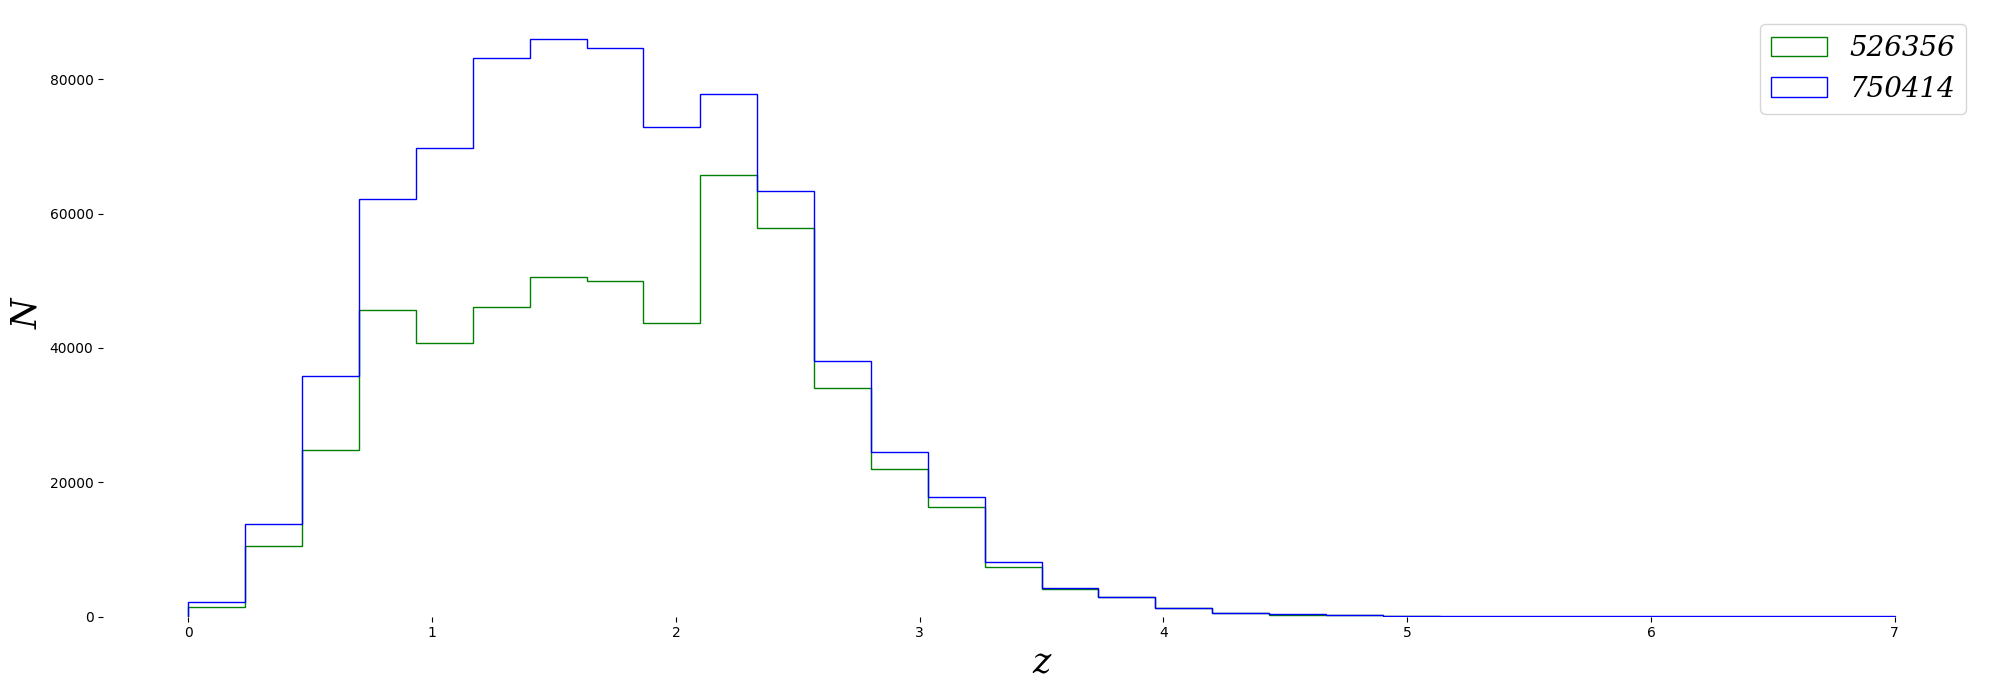

In [18]:
plt.rcParams["figure.figsize"] = [20, 7]
plt.rcParams["figure.autolayout"] = True

titles = ['eBOSS DR14Q catalog','eBOSS DR16Q catalog']

zm = [max(dr14['Z']),max(dr16['Z'])]

txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :20}


plt.hist(WQc14['Z'], bins = 30, label = len(WQc14), \
         ec="green", facecolor="none", histtype='step',range = (0,7))
plt.hist(WQc16['Z'], bins = 30, label = len(WQc16), \
         ec="blue", facecolor="none", histtype='step',range = (0,7))

plt.xlabel("z", style = 'oblique', family = 'serif', size = 25)
plt.ylabel("N", style = 'oblique', family = 'serif', size = 25)
plt.legend(loc="upper right", prop = txt_prop)

plt.show()

#### Redshift space

In [43]:
def hour(d):
    h = d*(24/360)
    return h

def rad(d):
    r = d*((2*np.pi)/360)
    return r

#### Coordinates

In [44]:
from astropy import units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt

titles = ['DR14Q subcatalog','DR16Q subcatalog']

RA14 = np.array(catfil_sv1['TARGET_RA'])
DEC14 = np.array(catfil_sv1['TARGET_DEC'])
eq14 = SkyCoord(RA14, DEC14, unit=u.deg)

ra_rad14 = eq14.ra.wrap_at(180 * u.deg).radian
dec_rad14 = eq14.dec.radian
z14 = np.array(catfil_sv1['Z'])
z16 = np.array(catfil_sv1['Z'])

RA16 = np.array(catfil_sv3['TARGET_RA'])
DEC16 = np.array(catfil_sv3['TARGET_DEC'])
eq16 = SkyCoord(RA16, DEC16, unit=u.deg)

ra_rad16 = eq16.ra.wrap_at(180 * u.deg).radian
dec_rad16 = eq16.dec.radian

/tmp/ipykernel_8892/1036010646.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
/tmp/ipykernel_8892/1036010646.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


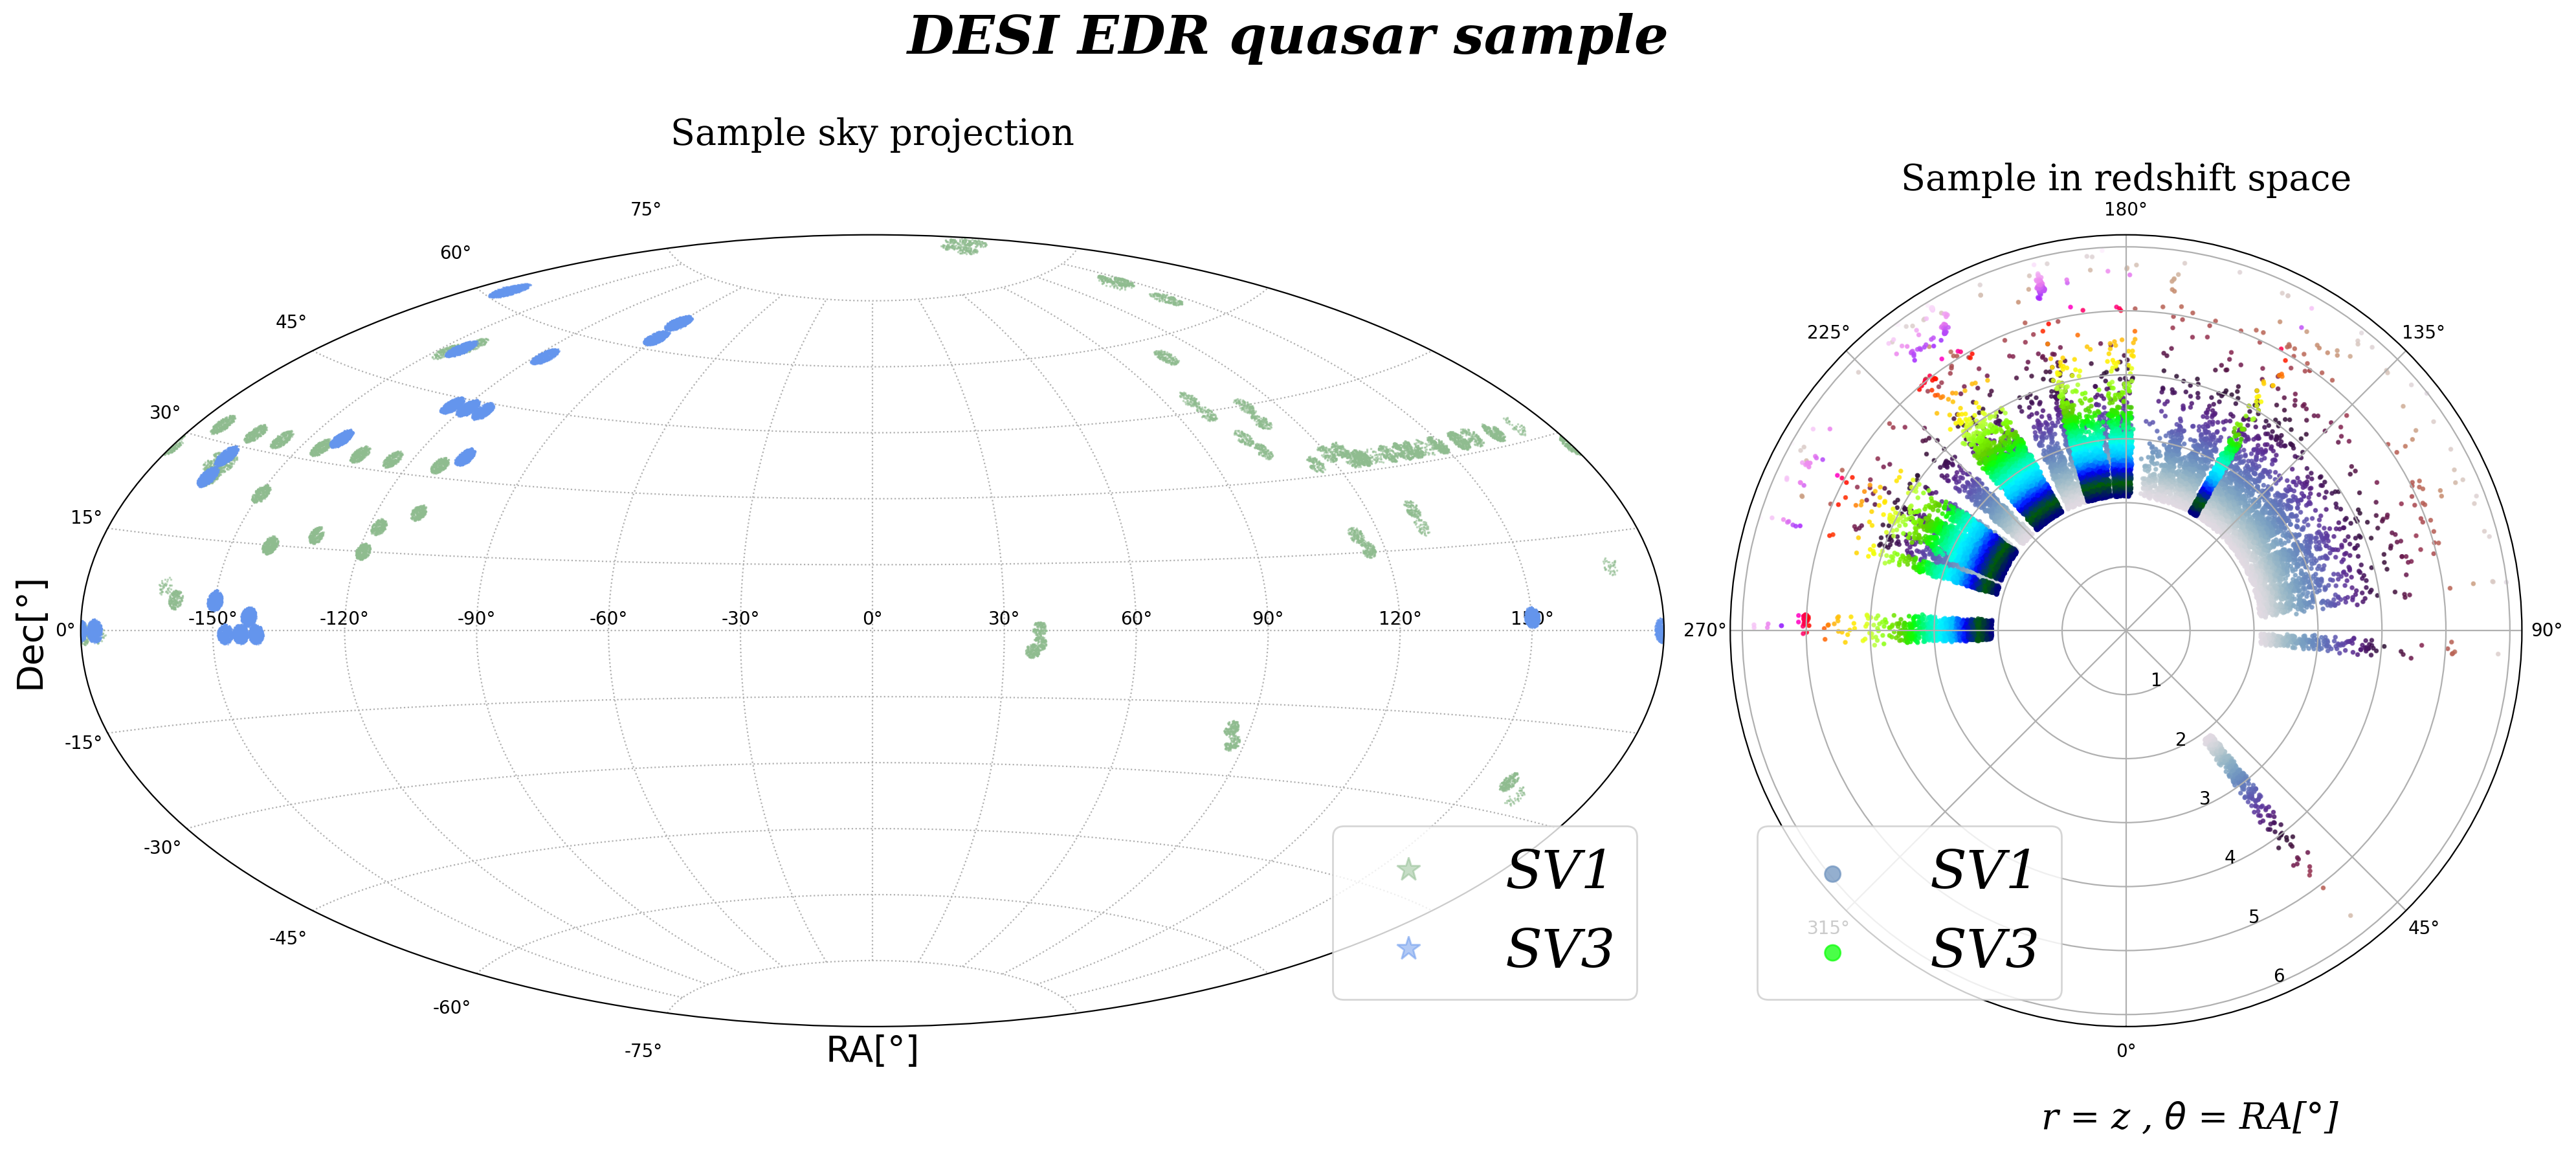

In [74]:
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :30}

fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(20,15),dpi=200)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sample sky projection',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad14, dec_rad14, '*', markersize=0.7, alpha=0.5, color = 'darkseagreen', label ='SV1')
ax0.plot(ra_rad16, dec_rad16, '*', markersize=0.7, alpha=0.5, color = 'cornflowerblue', label ='SV3')
ax0.grid(True,linestyle=':')
ax0.legend(loc="lower right", prop = txt_prop, markerscale=20)



ax1 = plt.subplot(122, projection='polar')
colorsDR14 = catfil_sv1['Z']
colorsDR16 = catfil_sv3['Z']
ax1.scatter(rad(catfil_sv1['TARGET_RA']), catfil_sv1['Z'], c=colorsDR14, 
            alpha=0.75,cmap='twilight', s=3, label ='SV1')
ax1.scatter(rad(catfil_sv3['TARGET_RA']), catfil_sv3['Z'], c=colorsDR16, 
            alpha=0.75,cmap='gist_ncar', s=3, label ='SV3') #, edgecolors = 'k'
ax1.set_theta_zero_location('W', offset=90)
ax1.legend(loc="lower left", prop = txt_prop, markerscale=5.0)
ax1.set_title("Sample in redshift space",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

fig.suptitle('DESI EDR quasar sample',x = 0.5,y = 0.8,weight='semibold',
             style = 'oblique',family = 'serif',fontsize = 30)





plt.show()

/tmp/ipykernel_8892/3845891868.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot(121, projection='aitoff')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_8892/3845891868.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(122, projection='polar')


NameError: name 'dr16' is not defined

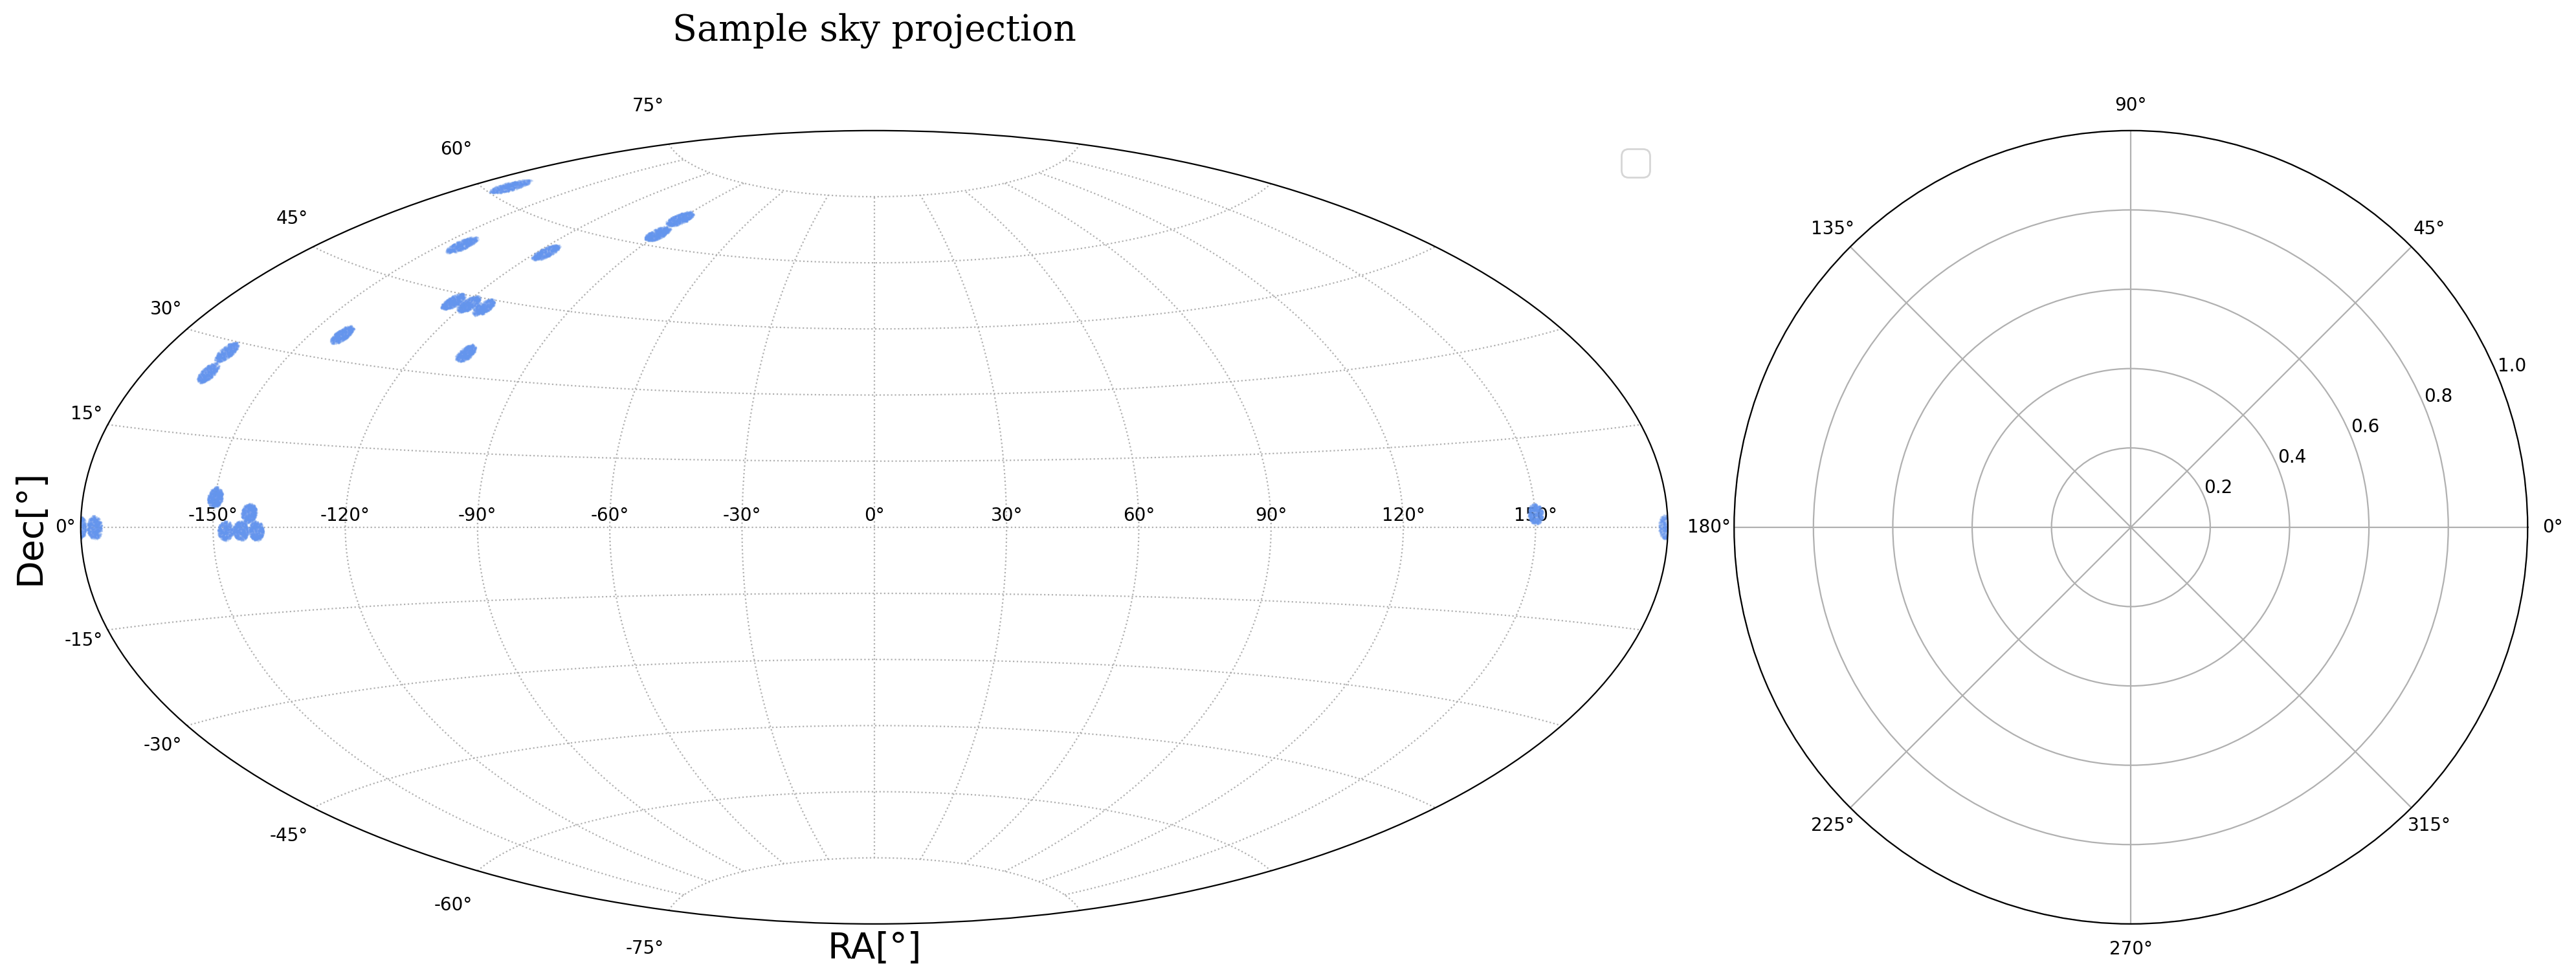

In [50]:
fig, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(20,15),dpi=200)

ax0 = plt.subplot(121, projection='aitoff')
ax0.set_title('Sample sky projection',x = 0.5,y = 1.1,
              weight='normal', style = 'normal', family = 'serif', size =20)
ax0.set_xlabel("RA[°]", size = 20)
ax0.set_ylabel("Dec[°]", size = 20)
ax0.plot(ra_rad16, dec_rad16, '*', markersize=0.7, alpha=0.2, color = 'cornflowerblue')
ax0.grid(True,linestyle=':')


ax1 = plt.subplot(122, projection='polar')
colorsDR16 = dr16['Z']
ax1.scatter(rad(dr16['RA']), dr16['Z'], c=colorsDR16, alpha=0.75,cmap='hsv', s=3)
ax1.set_theta_zero_location('W', offset=90)
ax1.set_title("Sample in redshift space",weight='normal', style = 'normal', family = 'serif', size =20)
label_position1=ax1.get_rlabel_position()
ax1.text(np.radians(label_position1-15),ax1.get_rmax()+1.5,r'r = z , ${\theta}$ = RA[°]',
        rotation=0,ha='center',va='center', style = 'oblique', family = 'serif', size = 20)

fig.suptitle('eBOSS DR16Q quasar sample',x = 0.5,y = 0.8,weight='semibold',
             style = 'oblique',family = 'serif',fontsize = 30)

plt.show()

#### DLA Proportion

In [23]:
fDLA_DR14 = "DLA_DR14CorRa.fits"
fDLA_DR16 = "DLA_DR16.fits"
l_fdlaDR14 = os.path.join(local_dir,fDLA_DR14)
l_fdlaDR16 = os.path.join(local_dir,fDLA_DR16)
DLA14 = Table.read(l_fdlaDR14)
DLA16 = Table.read(l_fdlaDR16)


MCID_14 = np.array(dr14['THING_ID']) 
MCID_16 = np.array(dr16['THING_ID'])

dlaID_14 = np.array(DLA14['THING_ID'])
dlaID_16 = np.array(DLA16['THING_ID'])

A = np.intersect1d(MCID_14,dlaID_14)
mask14 = np.isin(MCID_14,A)
mask14 = np.invert(mask14)
tp14 = MCID_14[mask14]

B = np.intersect1d(MCID_16,dlaID_16)
mask16 = np.isin(MCID_16,B)
mask16 = np.invert(mask16)
tp16 = MCID_16[mask16]


In [81]:
len(catfil_sv3)

14910

/tmp/ipykernel_8892/1669205603.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(z_ticks,fontsize = 15)
/tmp/ipykernel_8892/1669205603.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_yticklabels(N_ticks2,fontsize = 15)
/tmp/ipykernel_8892/1669205603.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(z_ticks,fontsize = 15)
/tmp/ipykernel_8892/1669205603.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(N_ticks,fontsize = 15)


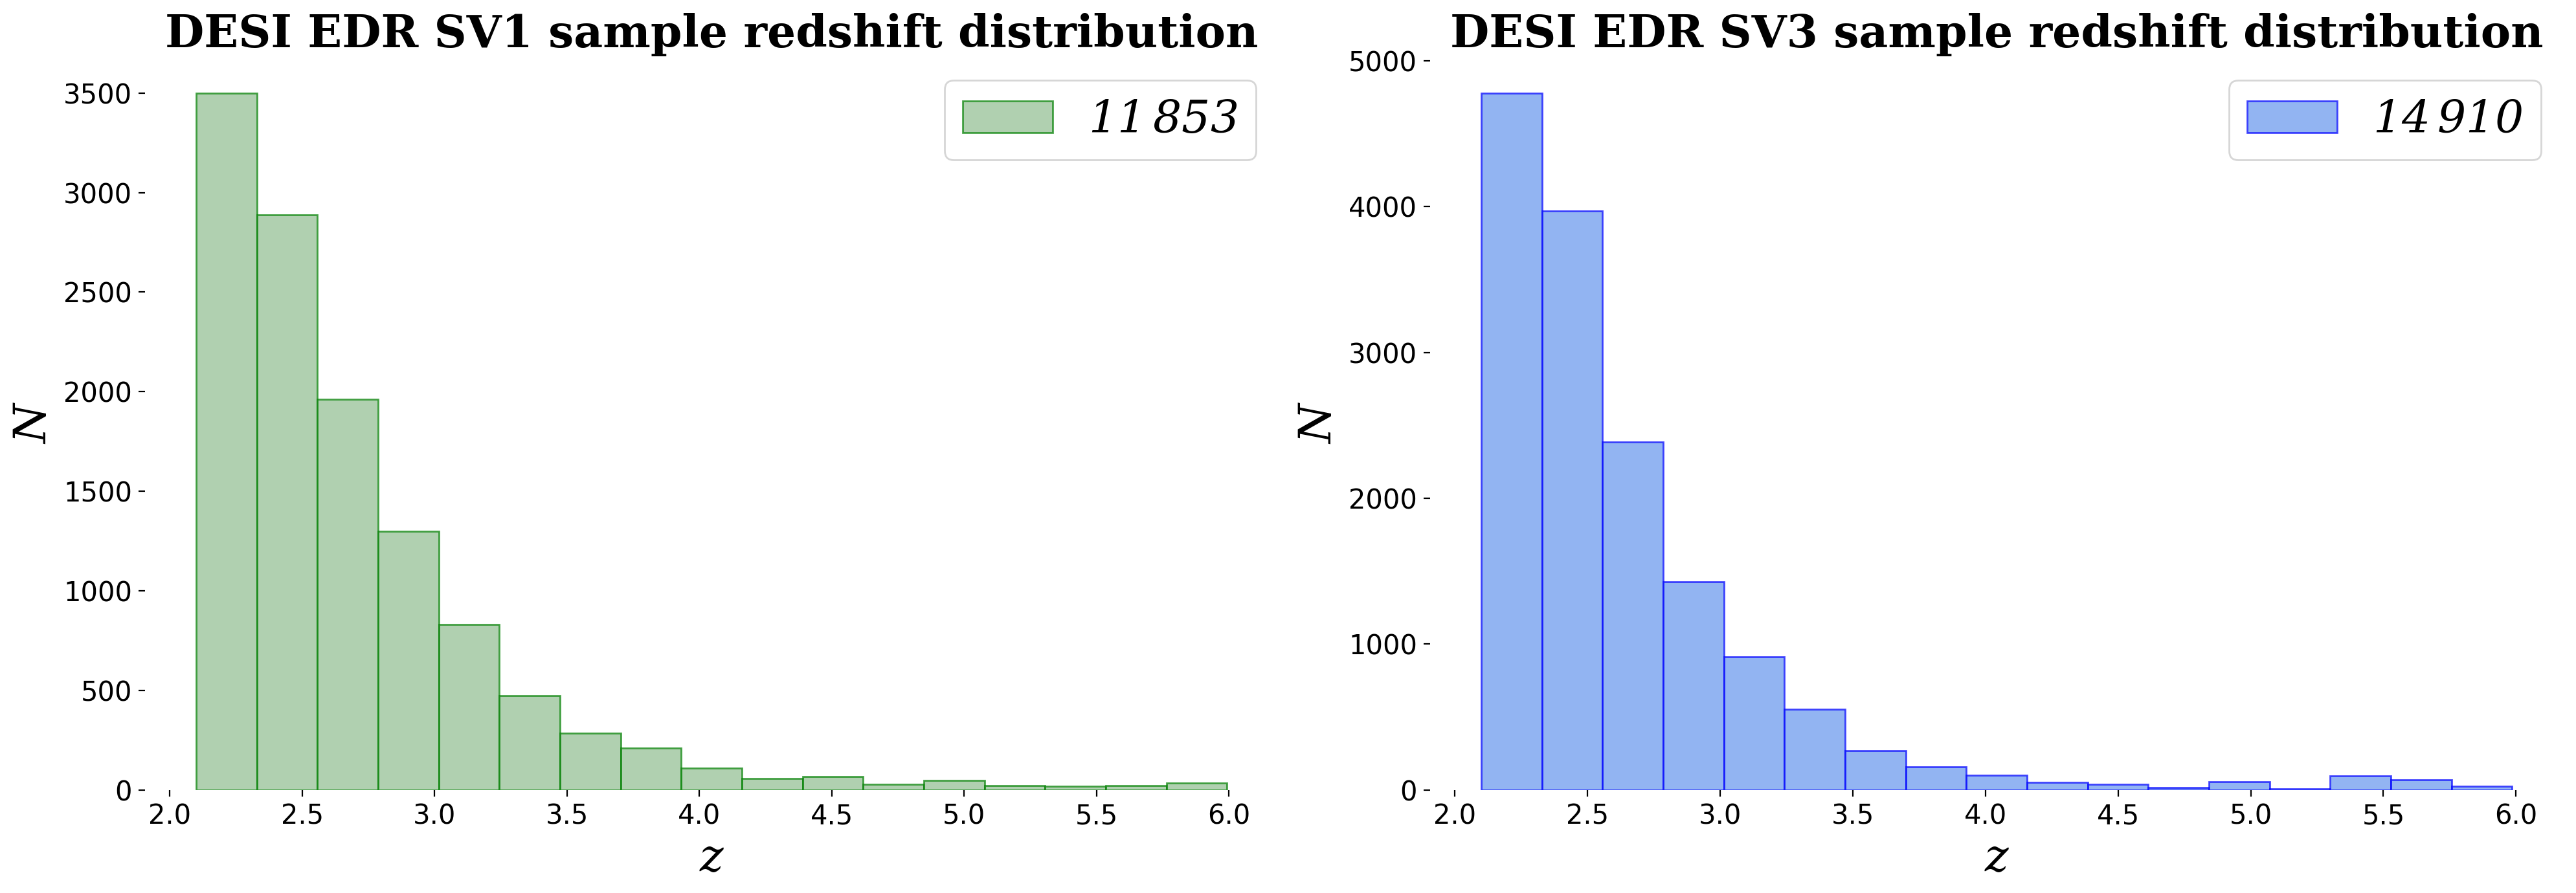

In [89]:
txt_prop = {'style' : 'oblique', 'family' : 'serif', 'size' :25}

titles = ['DESI EDR SV1 sample','DESI EDR SV3 sample']

z_ticks = [0,2.0,2.5,3.0,3.5,4.0,4.5,5.0,5.5,6.0]
N_ticks = [0,1000,2000,3000,4000,5000]
N_ticks2 = [0,500,1000,1500,2000,2500,3000,3500]
colrs14 = ["salmon","darkseagreen"]
colrs16 = ["salmon", "cornflowerblue"]

fig,(ax0, ax1) = plt.subplots(1,2,figsize=(20,7),dpi=200)

ax0 = plt.subplot(121)
ax0.hist(catfil_sv1['Z'],alpha = 0.7, color ='darkseagreen', label = '11$\,$853',bins = 17, edgecolor="green")
ax0.set_xlabel("z",style = 'oblique', family = 'serif', size = 25)
ax0.set_ylabel("N",style = 'oblique', family = 'serif', size = 25)
ax0.set_title(titles[0]+" redshift distribution", weight='semibold', style= 'normal', family = 'serif', size =25)
ax0.legend(loc="upper right", prop = txt_prop)
ax0.set_xticklabels(z_ticks,fontsize = 15)
ax0.set_yticklabels(N_ticks2,fontsize = 15)
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.spines['left'].set_visible(False)
ax0.spines['bottom'].set_visible(False)

ax1 = plt.subplot(122)
ax1.hist(catfil_sv3['Z'],alpha = 0.7, color = 'cornflowerblue', label = '14$\,$910',bins = 17, edgecolor="blue")
ax1.set_xlabel("z",style = 'oblique', family = 'serif', size = 25)
ax1.set_ylabel("N",style = 'oblique', family = 'serif', size = 25)
ax1.set_title(titles[1]+" redshift distribution", weight='semibold', style= 'normal', family = 'serif', size =25)
ax1.legend(loc="upper right", prop = txt_prop)
ax1.set_xticklabels(z_ticks,fontsize = 15)
ax1.set_yticklabels(N_ticks,fontsize = 15)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['bottom'].set_visible(False)



'''lbls = ["Spectra with DLA systems: "+str(len(A)), "Spectra w/o DLA systems: "+str(len(tp14))]
ax2 = plt.subplot(222)
ax2.pie([len(A), len(tp14)], startangle=0, 
        labels = lbls, explode = expl, colors =colrs14, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":"green",'linewidth': 2, 'linestyle': ':', 'antialiased': True, 'width' : 0.7})
ax2.set_title("DLAs in "+titles[0][6:11]+" sample",weight='semibold', style= 'normal', family = 'serif', size =25)
ax2.legend(fontsize = 17)

lbls = ["Spectra with DLA systems: "+str(len(B)), "Spectra w/o DLA systems: "+str(len(tp16))]
ax3 = plt.subplot(224)
ax3.pie([len(B), len(tp16)], startangle=0,
       labels = lbls, explode = expl, colors =colrs16, textprops = {'fontsize': 0}, 
        wedgeprops={"edgecolor":"blue",'linewidth': 2, 'linestyle': ':', 'antialiased': True, 'width' : 0.7})
ax3.set_title("DLAs in "+titles[1][6:11]+" sample",weight='semibold', style= 'normal', family = 'serif', size =25)
ax3.legend(fontsize = 17)'''


plt.show()

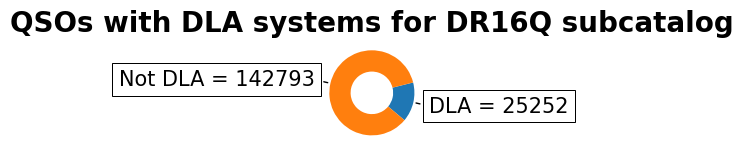

In [25]:
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(aspect="equal"))

recipe = [f"DLA = {len(A)}",
          f"Not DLA = {len(tp14)}"]
 
data = [len(A), len(tp14)]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, fontsize = 15)

ax.set_title("QSOs with DLA systems for DR16Q subcatalog", fontsize =20, weight='bold')

plt.show()

#### Percentage(z)

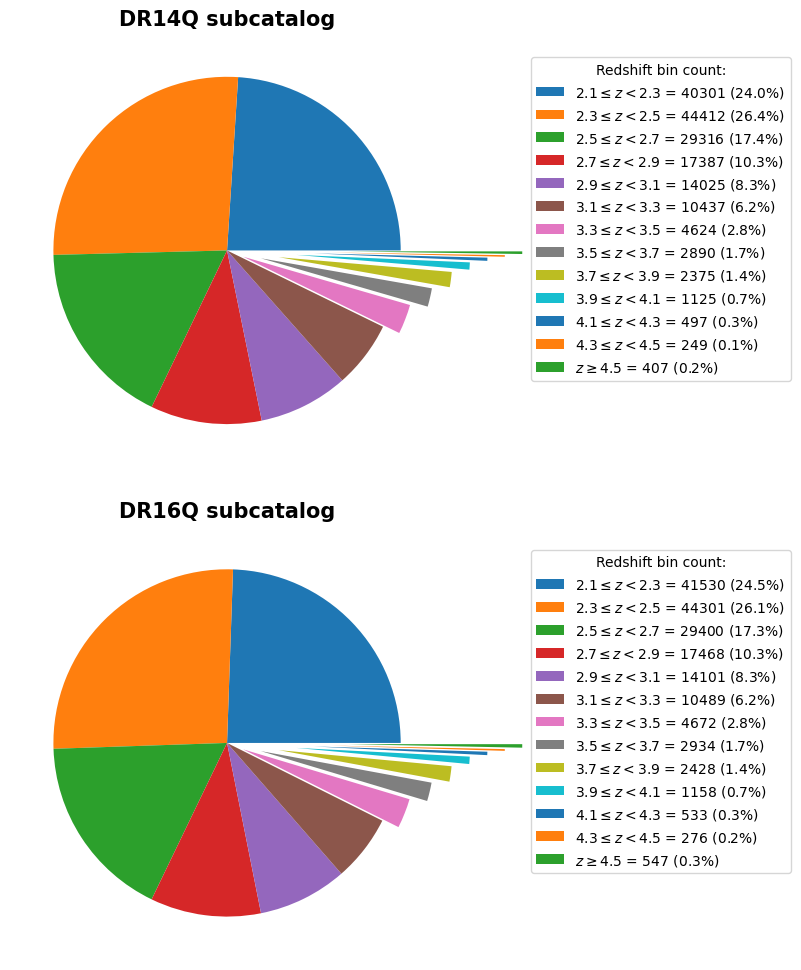

In [26]:
import numpy as np

colrs = ["coral", 
         "greenyellow",
         "khaki",
         "slateblue",
         "chocolate",
         "violet",
         "chartreuse",
         "aquamarine",
         "darkorange",
         "limegreen",
         "salmon",
         "royalblue",
         "peru"]


lbls = ["2.1$ \leq z < $2.3",
        "2.3$ \leq z < $2.5",
        "2.5$ \leq z < $2.7",
        "2.7$ \leq z < $2.9",
        "2.9$ \leq z < $3.1",
        "3.1$ \leq z < $3.3",
        "3.3$ \leq z < $3.5",
        "3.5$ \leq z < $3.7",
        "3.7$ \leq z < $3.9",
        "3.9$ \leq z < $4.1",
        "4.1$ \leq z < $4.3",
        "4.3$ \leq z < $4.5",
        "$z \geq $4.5"]

expl = [0,0,0,0,0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7]

c_lst14 = []
categ14 = []

plt.rcParams["figure.figsize"] = [10,10]
plt.rcParams["figure.autolayout"] = True
title = 'DR14Q subcatalog'
leap = 0.2
zbin = 2.1

for a in range(13):
    if(a<12):
        cond = (dr14['Z']<(zbin+leap)) & (dr14['Z']>=zbin)
        c_lst14.append(len(dr14[cond]))
        zbin = zbin + leap
    else:
        cond = (dr14['Z']>zbin)
        c_lst14.append(len(dr14[cond]))
        zbin = zbin + leap

for a in range(13):
    per = (c_lst14[a]/len(dr14))*100
    categ14.append(lbls[a]+" = "+str(c_lst14[a])+" ("+str(round(per,1))+"%)")

pidat14 = np.array(c_lst14)

plt.subplot(2, 1, 1)
plt.pie(pidat14, explode = expl, labeldistance = None, labels = categ14)
plt.title(title, loc = "center", fontsize =15, weight='bold')
plt.legend(title = "Redshift bin count:", loc = [1.2,0.2])

c_lst16 = []
categ16 = []

plt.rcParams["figure.figsize"] = [9,9]
plt.rcParams["figure.autolayout"] = True
title = 'DR16Q subcatalog'
leap = 0.2
zbin = 2.1

for a in range(13):
    if(a<12):
        cond = (dr16['Z']<(zbin+leap)) & (dr16['Z']>=zbin)
        c_lst16.append(len(dr16[cond]))
        zbin = zbin + leap
    else:
        cond = (dr16['Z']>zbin)
        c_lst16.append(len(dr16[cond]))
        zbin = zbin + leap

for a in range(13):
    per = (c_lst16[a]/len(dr16))*100
    categ16.append(lbls[a]+" = "+str(c_lst16[a])+" ("+str(round(per,1))+"%)")

pidat16 = np.array(c_lst16)

plt.subplot(2, 1, 2)
plt.pie(pidat16, explode = expl, labeldistance = None, labels = categ16)
plt.title(title, loc = "center", fontsize =15, weight='bold')
plt.legend(title = "Redshift bin count:", loc = [1.2,0.2])
plt.show()


#### P1D measurements

In [6]:
local_dir="/home/colgoat/TFPS"

import pandas as pd
file="/home/colgoat/TFPS/datapoints_p1d_fft_desi_edrm2_v1/p1d_measurement(copy).txt"
df = pd.read_csv(file, delim_whitespace = True, skiprows=0)
PSCh = df


file1="mean_Pk1d_DESIr1.fits.gz"
local_fileCh = os.path.join(local_dir,file1)
PSA=Table.read(local_fileCh)

qlor = ["magenta","red","blue","black","lime","orange", 
        "cyan","mediumpurple","goldenrod","royalblue","silver","green","maroon"]
trs = [0.5,0.7,1.0]
num=9 #number of redshift bins to be plotted
ini=0 #Starter plotting bin

#ini  = { 0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 ,10 ,11 ,12 }
z_bin = [2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0,4.2,4.4,4.6]

In [24]:
len(PA)

50

/tmp/ipykernel_8892/2413746327.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([-1,0,5,10,15,20,25],fontsize = 15)


Text(0.5, 1.0, 'Error estimation based on RKA23 results')

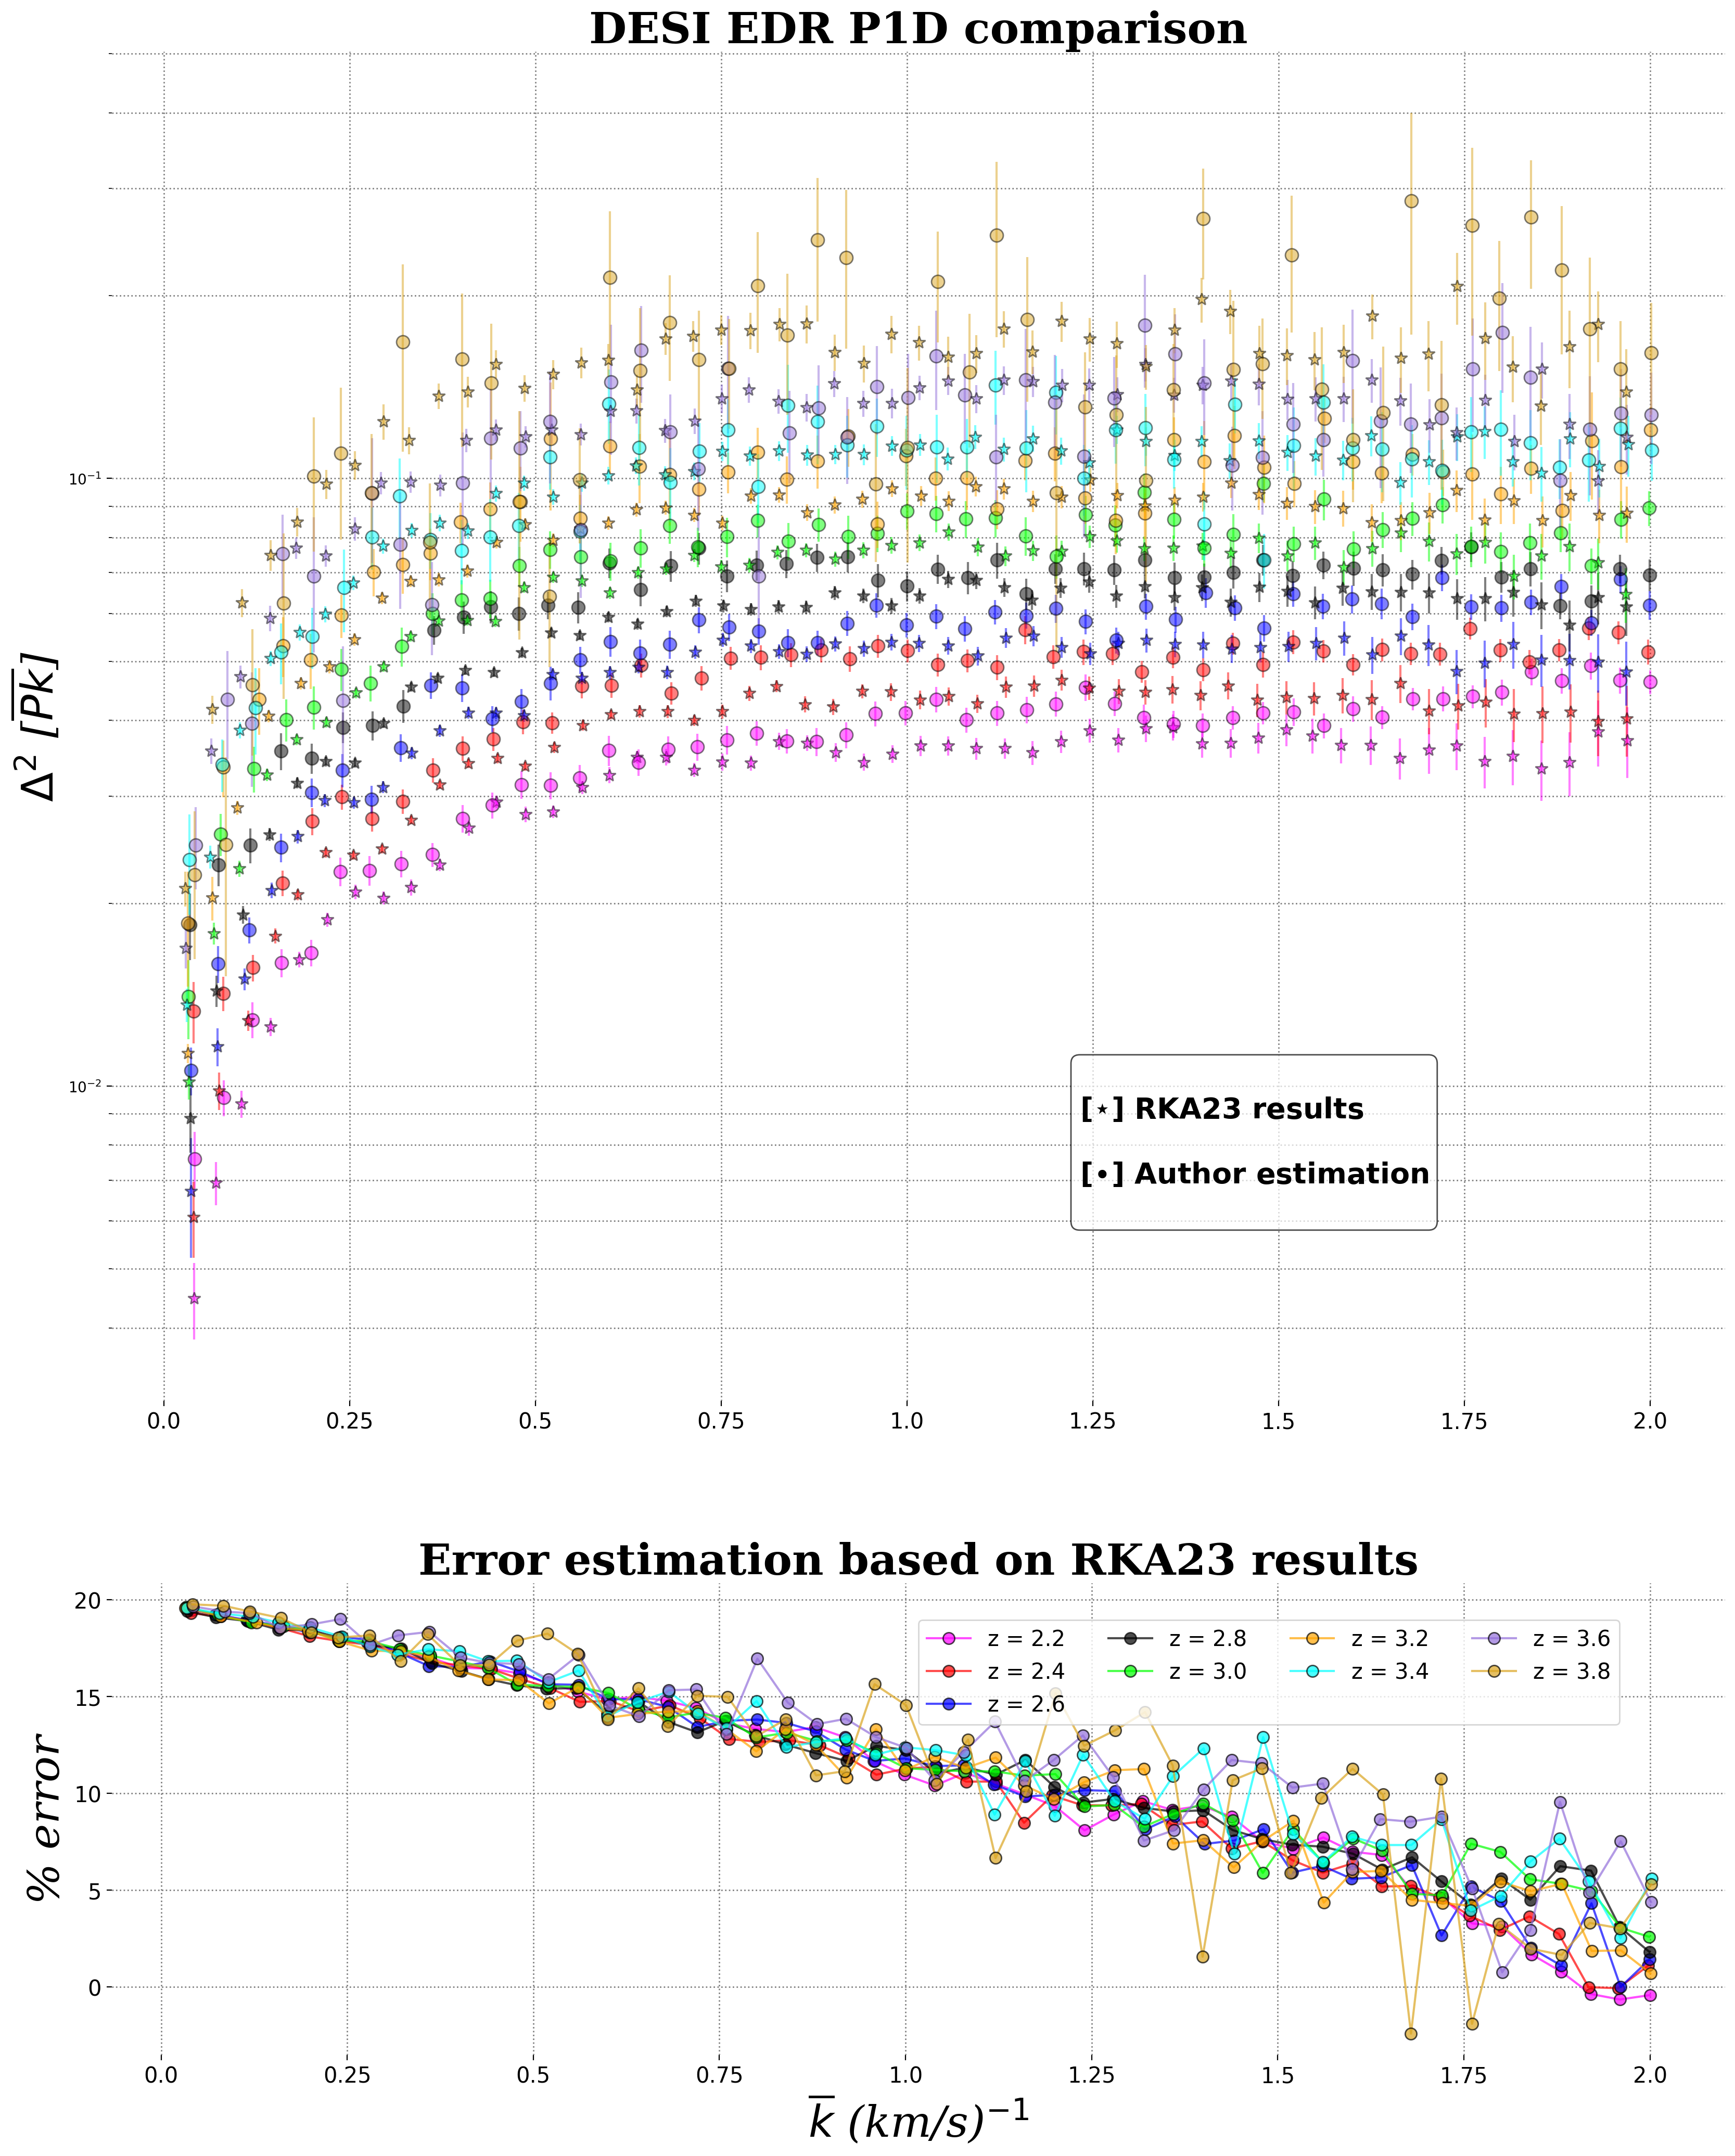

In [26]:
fig, axs = plt.subplots(2,1, gridspec_kw={'height_ratios': [2, 0.7]},figsize=(20,25),dpi=200)

for a in range(num):
    binZCh = (PSCh['Z'] == z_bin[ini+a])
    plCh = PSCh[binZCh]
    kCh = plCh['K']
    PCh = plCh['K*PK/PI']
    PCh_fe = (np.pi*PCh)/kCh
    PCh_fe = np.array(PCh_fe)
    erCh = plCh['K*ERR/PI']
    fu_Ch = ((erCh)) + (PCh) #fill upper
    fl_Ch = (PCh) - ((erCh)) #fill lower
    axs[0].errorbar(kCh,PCh,yerr = erCh, marker = '*', label = "bin z = "+str(z_bin[ini+a])+" expected",\
                    markersize = 9,color = qlor[ini+a], alpha = 0.5, mec ='k', linestyle = "none") 
    #axs[0].fill_between(kCh,fu_Ch,fl_Ch, alpha = 0.1,label = 'error coverage')

    binZA = (PSA['zbin'] == z_bin[ini+a])
    plA = PSA[binZA]
    kA = plA['meank']
    PA = (plA['meanPk'] *  plA['meank'])/np.pi
    erA = (plA['errorPk'] *  plA['meank'])/np.pi
    fu_A = ((erA)) + (PA) #fill upper
    fl_A = (PA) - ((erA)) #fill lower
    axs[0].errorbar(kA,PA,yerr = erA, marker = 'o', label = "bin z = "+str(z_bin[ini+a])+" calculated",\
                    markersize = 9, color = qlor[ini+a], alpha = 0.5, mec ='k', linestyle = "none")
    #axs[0].fill_between(kCh,fu_A,fl_A, alpha = 0.1,label = 'error coverage')
    
    
    EP = abs((PA-PCh_fe[0:50])/(PCh_fe[0:50]))*100
    axs[1].plot(kA,EP, marker = 'o', markersize = 8,color = qlor[ini+a],
                label = "z = "+str(z_bin[ini+a]),alpha = trs[1], mec ='k')


    
    
t = [0.000, 0.25, 0.50, 0.75,1.0, 1.25, 1.50,1.75,2.0]
P1d_y = [0.00,0.2]
    
    
axs[0].spines['top'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)    
axs[0].set_title('DESI EDR P1D comparison', weight='semibold', style= 'normal', family = 'serif', size =30)
axs[0].set_ylabel('${\Delta}^{2}$ [$\overline{Pk}$]',style = 'oblique', family = 'serif', size = 30)
axs[0].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
#axs[0].legend(loc='lower right', bbox_to_anchor=(1, 0))
axs[0].set_xticks(t)
axs[0].set_yscale('log')
axs[0].set_xticklabels(t,fontsize = 15)
#axs[0].set_yticklabels([np.log10(-2),np.log10(-1)],fontsize = 15)

props = dict(boxstyle='round', facecolor='white', alpha=0.7)
textstr = '\n'.join((
    r'',
    r'[$\star$] RKA23 results',
    r'',
    r'[$\bullet$] Author estimation',
    r''
    ))
axs[0].text(0.6, 0.25, textstr, transform=axs[0].transAxes, fontsize=20,
        verticalalignment='top', bbox=props, weight = 'bold')

axs[1].spines['top'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].set_xlabel('$\overline{k}$ (km/s)$^{-1}$',style = 'oblique', family = 'serif', size = 30)
axs[1].set_ylabel('% error',style = 'oblique', family = 'serif', size = 30)
axs[1].grid(True, which="both", ls=":", color = 'gray', linewidth = 1)
axs[1].legend(loc = [0.001,20],bbox_to_anchor=(0.5, 0.7), ncol=4, fontsize =15)
axs[1].set_xticks(t)
axs[1].set_xticklabels(t,fontsize = 15)
axs[1].set_yticklabels([-1,0,5,10,15,20,25],fontsize = 15)
plt.title('Error estimation based on RKA23 results', weight='semibold', style= 'normal', family = 'serif', size =30)

